In [12]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()

#print(iris.feature_names)
#print(iris.target_names)
#print(iris.data)

x = iris['data']
y = iris['target']

#print(x)
#print(y)


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

In [15]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.9777777777777777


In [16]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(20))  # show first 20 comparisons

    Actual  Predicted
0        1          1
1        0          0
2        2          2
3        1          1
4        1          2
5        0          0
6        1          1
7        2          2
8        1          1
9        1          1
10       2          2
11       0          0
12       0          0
13       0          0
14       0          0
15       1          1
16       2          2
17       1          1
18       1          1
19       2          2


In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm) 

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [20]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred, target_names=iris.target_names)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [23]:
from sklearn.tree.export import export_text
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- class: 2



[Text(1116.0, 2265.0, 'petal width (cm) <= 0.8\nentropy = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(558.0, 1359.0, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(1674.0, 1359.0, 'petal width (cm) <= 1.75\nentropy = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(1116.0, 453.0, 'entropy = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(2232.0, 453.0, 'entropy = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

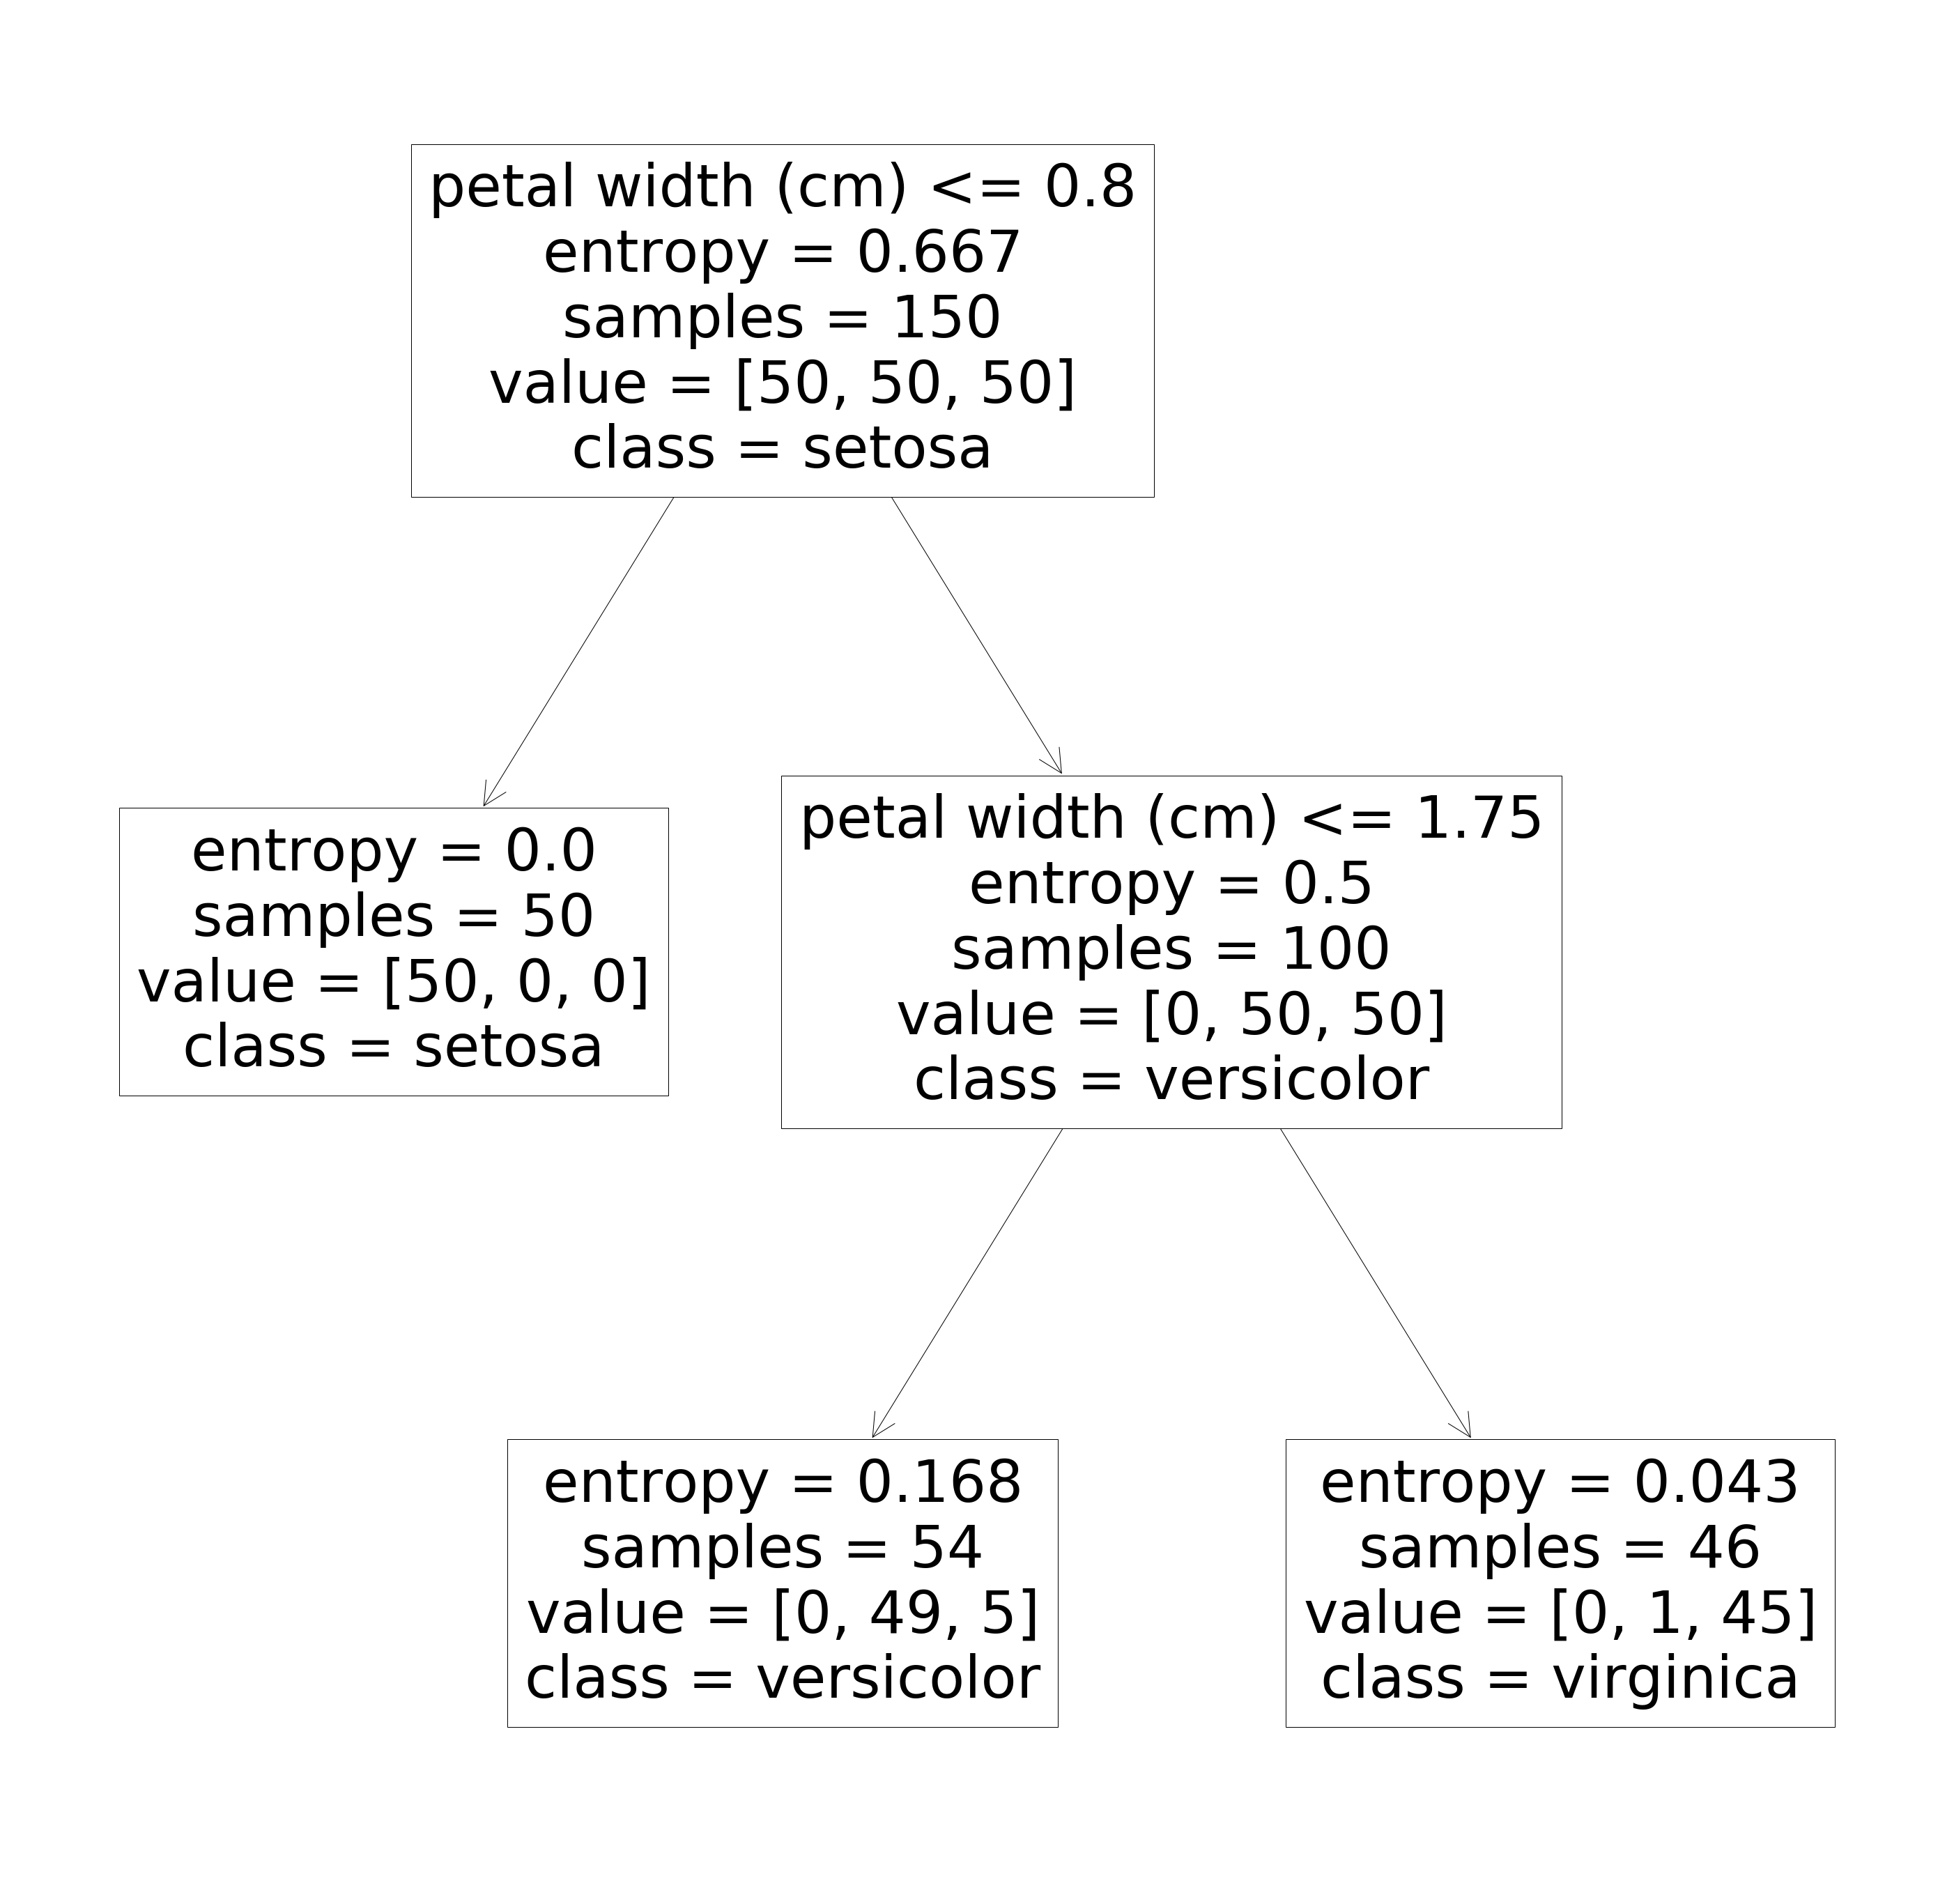

In [30]:
import sklearn.tree as tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50,50))
tree.plot_tree(decision_tree,feature_names=iris['feature_names'],class_names=iris.target_names)